# Homework 4: Iteration and Randomness

## Due Friday, April 30th at 11:59pm

Welcome to Homework 4! This week, we will go over probability, simulations using iteration, visualizations, and functions. You can find additional help on these topics in [Chapter 05](https://eldridgejm.github.io/dive_into_data_science/05-probability_and_simulation/probability_and_simulation.html) of the textbook.


### Instructions

This assignment is due Friday, April 30th at 11:59pm. You are given six slip days thoughout the quarter which can extend the deadline by one day. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

You should start early so that you have time to get help if you're stuck. You may attend any Tutor's Office Hours. The calendar and links are available on Canvas.

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Remember that you may work in pairs for this assignment! If you work in a pair, you should submit one notebook to Gradescope for the both of you.

Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# please don't change this cell, but do make sure to run it
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
import otter
grader = otter.Notebook()

## 1. Video Game Sales

Video games have been popular for decades, but with the advancement of technology, games and consoles have become more advanced. With the technological progress came staggering growth of the video game industry. In only 5 years, from 2015 to 2020, the video game industry has grown from a global market value of \\$93.1 billion to \\$159.3 billion, around a 71% growth. In the same time period, the number of active gamers worldwide has grown from 1.99 billion to 2.69 billion, around a 35% increase. For more statistics about the video game industry, check out this [website](https://www.statista.com/topics/868/video-games/).

In this problem, we will be using a dataset of video games since 1980. The source of the data is [here](https://www.kaggle.com/gregorut/videogamesales).

We have cleaned the data so there are no null (NaN) values. Due to this, you may notice that the `Rank` column may have some gaps, since any games with an NaN value was deleted. Don't worry about this! The data has the following columns:


|Column|Description|
|------|-----------|
|Rank|The overall ranking of the game based on Global Sales|
|Name|Name of the video game|
|Platform|Console of the video game (DS, PS4, PC, etc.)|
|Year|Release year of the game|
|Genre|Genre of the game|
|Publisher|Publisher of the Game(Electronic Arts, Activision, Sega, etc.)|
|NA_Sales|Sales in North America (in millions)|
|Global_Sales|Global sales (in millions)|

In [2]:
video_games = bpd.read_csv('data/vg_sales.csv')
video_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,31.37
...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01


**Question 1.1** 

Suppose it is November 2012 and the Wii U has just been released by Nintendo. As a result, all Wii games are on sale! There is a buy 10, get 10 free offer. Since you have a Wii, you decide to seize the offer and head over to GameStop to buy 10 Wii games and get 10 for free. GameStop only stocks up on games from the past 5 years, which is from 2007 to 2012 (inclusive on both ends). Once you’re at GameStop, you cannot decide which games to buy, so you’ll select 20 different games at random, 10 of which you'll need to pay for. 

Store the possible games to select from in `possible_games`. What proportion of the 20 games you selected came from the Sports genre? Store this value in `sports_games`.

In [3]:
possible_games = video_games[(video_games.get('Platform') == 'Wii') & 
                            (video_games.get('Year') >= 2007) & 
                            (video_games.get('Year') < 2013)]

sports_games = possible_games.sample(20)
sports_games = sports_games[sports_games.get('Genre') == 'Sports'].shape[0] / possible_games.shape[0]
sports_games

0.0024509803921568627

In [4]:
grader.check("q1_1")

q1_1 passed!

**Question 1.2** 

Suppose you work at GameStop now. It’s 2014 and you want to buy a wide variety of games for your PS4. You decide to make 100 trips to the store and choose 5 PS4 games at a random each time. Each time you visit the store, your manager asks you to report the average of the Global Sales of the 5 games. Keep in mind that Gamestop only stocks up on games from the last 5 years, which is 2009-2014 (inclusive).

Store the average Global Sales of the games for your 100 trips in a list called `sales_global`.

In [5]:
sales_global = []
games_to_buy = video_games[(video_games.get('Platform') == 'PS4') & 
                            (video_games.get('Year') > 2008) & 
                            (video_games.get('Year') < 2015)]

for i in np.arange(100):
    bought = games_to_buy.sample(5)
    sales_global = list(np.append(sales_global, bought.get('Global_Sales').mean()))

sales_global

[2.186,
 0.758,
 1.22,
 1.372,
 2.15,
 0.8959999999999999,
 2.4639999999999995,
 0.61,
 0.446,
 0.8019999999999999,
 0.23400000000000004,
 0.526,
 1.286,
 2.586,
 0.826,
 2.5460000000000003,
 0.378,
 0.5940000000000001,
 1.3279999999999998,
 0.314,
 0.8200000000000001,
 1.04,
 0.8959999999999999,
 2.594,
 1.3579999999999999,
 0.454,
 1.4339999999999997,
 1.1919999999999997,
 0.744,
 1.364,
 1.594,
 1.35,
 1.2100000000000004,
 1.55,
 0.752,
 0.5920000000000001,
 1.114,
 2.178,
 1.984,
 1.518,
 1.956,
 0.41800000000000004,
 0.9339999999999999,
 3.66,
 0.382,
 0.834,
 1.0,
 1.8239999999999998,
 2.46,
 1.8459999999999996,
 0.41000000000000003,
 1.394,
 0.37,
 1.134,
 3.436,
 1.6320000000000001,
 3.304,
 1.746,
 1.5219999999999998,
 1.286,
 1.46,
 1.706,
 0.6519999999999999,
 1.1300000000000001,
 0.738,
 1.9940000000000002,
 1.716,
 1.1039999999999999,
 2.7700000000000005,
 1.072,
 1.08,
 1.344,
 1.112,
 1.956,
 1.7400000000000002,
 1.0999999999999999,
 1.1199999999999999,
 0.67999999999999

In [6]:
grader.check("q1_2")

q1_2 passed!

**Question 1.3** It's Prime Day in 2015, which means all games released in 2015 are on sale! You want to take advantage of the discounted prices, but with the wide variety of games available, you don't know which one to buy, so you decide to get 5 games at random. As an avid fan of Nintendo games, you wonder about the probability that at least one of your randomly purchased games of 2015 is from Nintendo. Calculate this probability and store this value in `nintendo_probability.`

In [7]:
# purchased = video_games.sample(5)
publishers = video_games[(video_games.get('Year') == 2015)].groupby('Publisher').count().shape[0]
none_nintendo = (90/91)*(89/90)*(88/89)*(87/88)*(86/87)
nintendo_probability = 1 - none_nintendo 
nintendo_probability

0.05494505494505486

In [8]:
grader.check("q1_3")

q1_3 passed!

**Question 1.4** You and your friend are in an intense debate about which is the better console: XBOX 360 or the PlayStation 4. To settle the argument, you both agree to utilize random sampling to determine which is the more popular console. To do so, randomly sample 25 XBOX 360 Games from 2014 (X360) and 25 PlayStation 4 Games from 2014 (PS4), taking the mean 'Rank' of both samples. Store the absolute value of the difference of the sample means in the variable `console_diff.`

In [9]:
xbox_games = video_games[(video_games.get('Platform') == 'X360') & 
                            (video_games.get('Year') == 2014)].sample(25).get('Rank').mean()

ps4_games = video_games[(video_games.get('Platform') == 'PS4') & 
                            (video_games.get('Year') == 2014)].sample(25).get('Rank').mean()
console_diff = abs(xbox_games - ps4_games)
console_diff

235.6800000000003

In [10]:
grader.check("q1_4")

q1_4 passed!

## 2. Sampling

We'll use some NBA data to get some practice with sampling.
Run the cell below to load the player and salary data.

In [11]:
player_data = bpd.read_csv("data/player_data.csv").set_index('Name')
salary_data = bpd.read_csv("data/salary_data.csv").set_index('PlayerName')
full_data = salary_data.merge(player_data, left_index=True, right_index=True)

player_data

,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Name,,,,,,,,,
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
...,...,...,...,...,...,...,...,...,...
Adreian Payne,23,TOT,32,162,30,19,9,44,213
Ricky Ledo,22,TOT,17,36,19,6,1,26,90
Gary Harris,20,DEN,55,64,29,39,7,38,188


In [12]:
salary_data

,Salary
PlayerName,
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790
Carmelo Anthony,22458401
Dwight Howard,21436271
...,...
Sim Bhullar,29843
David Stockton,29843
David Wear,29843


In [13]:
full_data

,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Kobe Bryant,23500000,36,LAL,35,199,197,47,7,128,782
Amar'e Stoudemire,23410988,32,TOT,59,329,45,29,38,78,680
Joe Johnson,23180790,33,BRK,80,384,292,59,14,137,1154
Carmelo Anthony,22458401,30,NYK,40,264,122,40,17,89,966
Dwight Howard,21436271,29,HOU,41,431,50,28,53,115,646
...,...,...,...,...,...,...,...,...,...,...
Sim Bhullar,29843,22,SAC,3,1,1,0,1,0,2
David Stockton,29843,23,SAC,3,2,9,2,0,4,8
David Wear,29843,24,SAC,2,2,1,0,0,0,0
Andre Dawkins,29843,23,MIA,4,2,1,0,0,1,3


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

A **statistical inference** is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3 million".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the loading and analysis code into two functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

**Question 2.1**. Complete the `histograms` function, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. Use the min and max functions to pick the bin boundaries so that all data appears for any table passed to your function. Use the same bin widths as before (1 year for `Age` and $1,000,000 for `Salary`). 

*Hint:* Make sure that your bins **include** the maximum value.  Remember that bins include the left value but exclude the right value.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

Two histograms should be displayed below


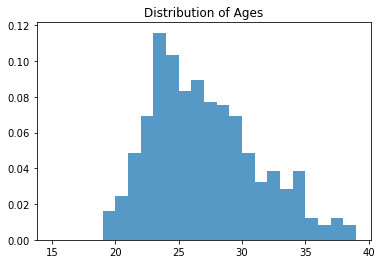

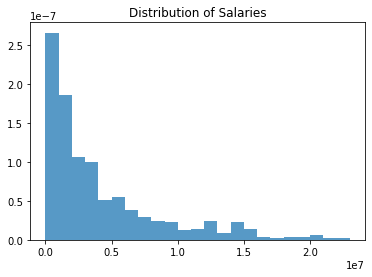

In [14]:
def histograms(t):
    ages = t.get('Age')
    salaries = t.get('Salary')
    age_bins = np.arange(15, 40, 1)
    salary_bins = np.arange(0, 23500001, 1000000)
    
    a = plt.figure(1)
    plt.hist(ages, bins=age_bins, density=True, alpha=.75)
    plt.title('Distribution of Ages')
    a.show()
    s = plt.figure(2)
    plt.hist(salaries, bins=salary_bins, density=True, alpha=.75)
    plt.title('Distribution of Salaries')
    s.show()
    return age_bins, salary_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

<!-- END QUESTION -->



**Question 2.2**. Create a function called `compute_statistics` that takes a DataFrame containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Return a two-element array containing the average age and average salary

You can call your `histograms` function to draw the histograms!

[26.536585365853657, 4269775.766260163]

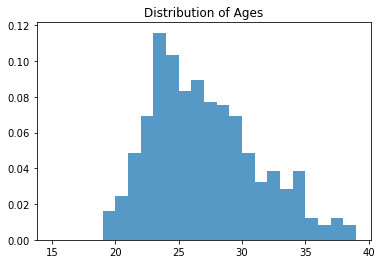

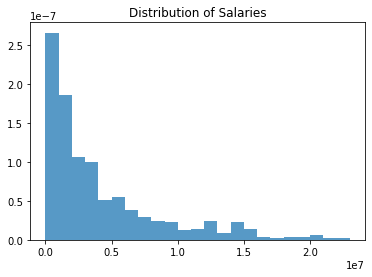

In [15]:
def compute_statistics(age_and_salary_data):
    age = age_and_salary_data.get('Age')
    salary = age_and_salary_data.get('Salary')
    histograms(age_and_salary_data)
    return list(np.array([age.mean(), salary.mean()]))
    
    
full_stats = compute_statistics(full_data)
full_stats

In [16]:
grader.check("q2_2")

q2_2 passed!

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team that's near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.3**  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [17]:
convenience_sample = full_data[full_data.get('Age') < 22]
convenience_sample

,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Michael Kidd-Gilchrist,5016960,21,CHO,55,416,77,30,38,63,598
Jabari Parker,4930560,19,MIL,25,138,42,31,5,47,308
...,...,...,...,...,...,...,...,...,...,...
Spencer Dinwiddie,700000,21,DET,34,48,104,19,6,33,145
Johnny O'Bryant,600000,21,MIL,34,64,17,5,4,25,100
K.J. McDaniels,507336,21,TOT,62,200,72,44,70,105,487
JaKarr Sampson,507336,21,PHI,74,163,77,38,26,76,386


In [18]:
grader.check("q2_3")

q2_3 passed!

**Question 2.4** Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

[20.363636363636363, 2383533.8181818184]

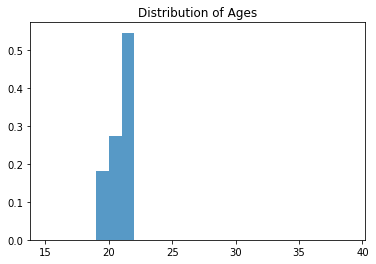

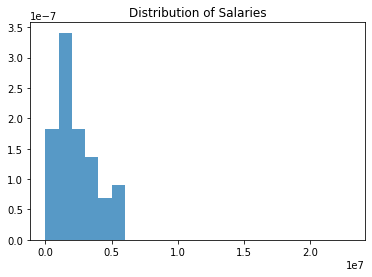

In [19]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [20]:
grader.check("q2_4")

q2_4 passed!

Next, we'll compare the convenience sample salaries with the full data salaries.

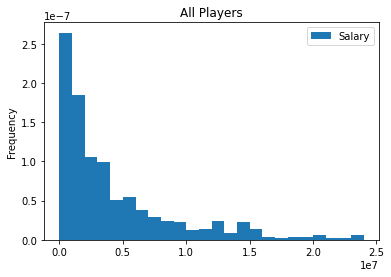

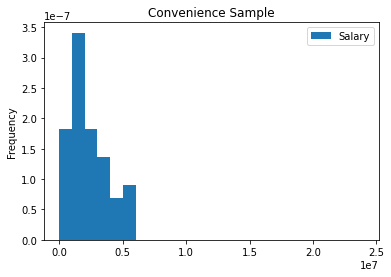

In [21]:
# just run this cell, don't change it
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    bins = np.arange(0, 25_000_000, 1_000_000)
    first.plot(kind='hist', y='Salary', bins=bins, density=True)
    plt.title(first_title)
    second.plot(kind='hist', y='Salary', bins=bins, density=True)
    plt.title(second_title)

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 2.5** From what you see in the histogram above, does the convenience sample give us an accurate picture of the age and salary of the full population of NBA players in 2014-2015?  Would you expect it to, in general?  Assign either 1, 2, 3, or 4 to the variable `sampling_q5` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
2. No. The sample is too small, so it won't give us an accurate representation of the population.
3. No. But this was just an unlucky sample, normally this would give us an accurate representation of the population.
4. No. This type of sample doesn't give us an accurate representation of the population.

In [22]:
sampling_q5 = 4
sampling_q5

4

In [23]:
grader.check("q2_5")

q2_5 passed!

### Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "simple random sample" or "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in a hat, and shuffling the hat.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two samples of the `salary_data` table in this way: `small_srswor_salary.csv` and `large_srswor_salary.csv` contain, respectively, a sample of size 44 (the same as the convenience sample) and a larger sample of size 100.  

The `load_data` function below loads a salary table and joins it with `player_data`.

In [24]:
def load_data(salary_file):
    return player_data.merge(bpd.read_csv(salary_file), left_index=True, right_on='PlayerName')

**Question 2.6** Run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.  Compare the accuracy of the estimates of the population statistics that we get from the small simple random sample, the large simple random sample, and the convenience sample. 

**Note:** `small_srswor_data` and `large_srswor_data` should be DataFrames loaded from their respective `data/small_srswor_salary.csv` and `data/large_srswor_salary.csv`

Full data stats:                  [26.536585365853657, 4269775.766260163]
Small simple random sample stats: [26.318181818181817, 4283910.886363637]
Large simple random sample stats: [26.42, 4821322.5]
Convenience sample stats:         [20.363636363636363, 2383533.8181818184]


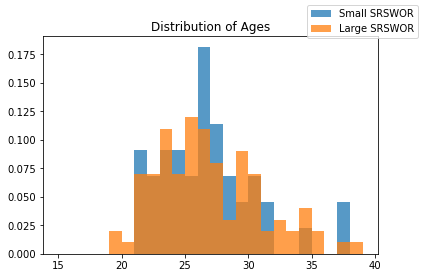

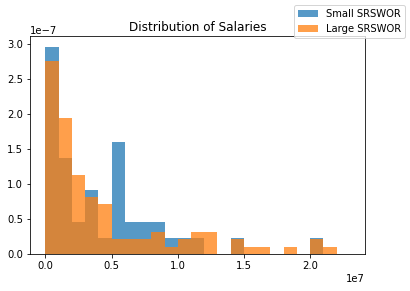

In [25]:
small_srswor_data = load_data('data/small_srswor_salary.csv')
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data('data/large_srswor_salary.csv')
large_stats = compute_statistics(large_srswor_data)
convenience_stats # = compute_statistics(convenience_stats)

plt.figure(1).legend(['Small SRSWOR', 'Large SRSWOR', 'Convenience'])
plt.figure(2).legend(['Small SRSWOR', 'Large SRSWOR', 'Convenience'])
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)
print('Convenience sample stats:        ', convenience_stats)

In [26]:
grader.check("q2_6")

q2_6 passed!

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  The randomized response technique was one example we saw in lecture with united flight delays.  Another is to help us understand how inaccurate other samples are.

DataFrames provide the method `sample()` for producing random samples.  Note that its default is to sample **without** replacement. To see how to call `sample()` enter`full_data.sample?` into a code cell and press Enter.

In [27]:
full_data.sample?

**Question 2.7** Produce a simple random sample of size 44 from `full_data` *with replacement*.  (You don't need to bother with a merge this time –– just use `full_data.sample(...)` directly.  That will have the same result as sampling from `salary_data` and joining with `player_data`.)  Run your analysis on it again.

[27.386363636363637, 4388616.295454546]

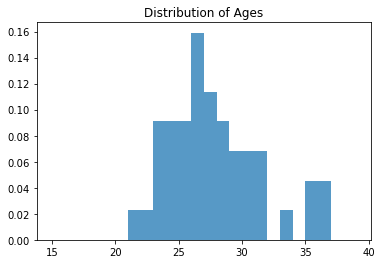

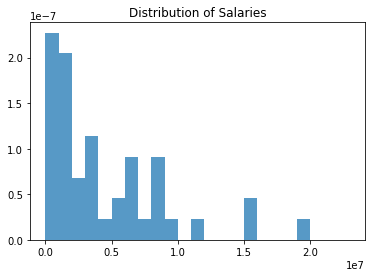

In [28]:
my_small_srswor_data = full_data.sample(44, replace=True)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

Are your results similar to those in the small sample we provided you? Do things change a lot across separate samples? Run your code several times to get new samples. Assign either 1, 2, 3, or 4 to the variable `sampling_q7` below.
1. The results are very different from the small sample, and don't change at all across separate samples.
2. The results are very different from the small sample, and change a bit across separate samples.
3. The results are slightly different from the small sample, and change a bit across separate samples.
4. The results are not at all different from the small sample, and don't change at all across separate samples.

In [29]:
sampling_q7 = 4
sampling_q7

4

In [30]:
grader.check("q2_7")

q2_7 passed!

**Question 2.8** As in the previous question, analyze several simple random samples of size 100 from `full_data`.

[25.83, 3736106.62]

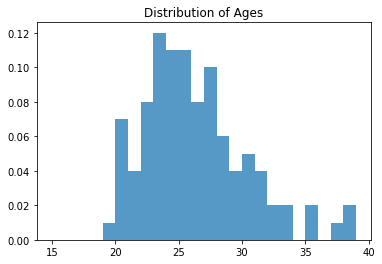

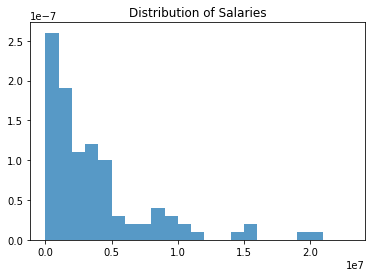

In [31]:
my_large_srswor_data = full_data.sample(100, replace=True)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

Do the average and histogram statistics seem to change more or less across samples of this size than across samples of size 44?  And are the sample averages and histograms closer to their true values for age or for salary?  Assign either 1, 2, 3, 4, or 5 to the variable `sampling_q8` below. 

Is this what you expected to see?
1. The statistics change *less* across samples of this size than across smaller samples. The statistics are closer to their true values for *age* than they are for *salary*.
2. The statistics change *less* across samples of this size than across smaller samples. The statistics are closer to their true values for *salary* than they are for *age*.
3. The statistics change *more* across samples of this size than across smaller samples. The statistics are closer to their true values for *age* than they are for *salary*.
4. The statistics change *more* across samples of this size than across smaller samples. The statistics are closer to their true values for *salary* than they are for *age*.
5. The statistics change an *equal amount* across samples of this size as across smaller samples. The statistics for age and salary are *equally close* to their true values.

In [32]:
sampling_q8 = 4
sampling_q8

4

In [33]:
grader.check("q2_8")

q2_8 passed!

## 3. Jupyter Notebook Cells

Suppose we found a super long Jupyter notebook file with 1000 cells. Some of the cells are Code cells, and the others are Markdown cells. The file `cells.csv` contains 1000 rows, with each row representing the type of a cell in the Jupyter notebook. Let's read `cells.csv` into a table called `cell_table`.

In [34]:
cell_table = bpd.read_csv("data/cells.csv")
cell_table

,Cell Type
0,Code
1,Code
2,Code
3,Code
4,Code
...,...
995,Code
996,Markdown
997,Markdown
998,Code


**Question 3.1.** You're interested in the proportion of Code cells in the file. Calculate the true proportion of Code cells and store it in the variable `code_true_prop`.

In [35]:
code_true_prop = np.count_nonzero(cell_table.get('Cell Type') == 'Code') / cell_table.shape[0]
code_true_prop

0.711

In [36]:
grader.check("q3_1")

q3_1 passed!

**Question 3.2.** If you are only able to randomly sample 200 different cells. Which of the following would create a representative sample of the cells in the file? Assign 1, 2, 3, or 4 to `q3_2`.

1. `cell_table.take(np.arange(200))`
2. `cell_table.iloc[0:200]`
3. `cell_table.sample(200, replace=True)`
4. `cell_table.sample(200, replace=False)`
5. `cell_table[cell_table.get('Cell Type') == 'Code'].sample(200, replace=False)`
6. `cell_table[cell_table.get('Cell Type') == 'Markdown'].sample(200, replace=False)`

In [37]:
q3_2 = 4
q3_2

4

In [38]:
grader.check("q3_2")

q3_2 passed!

**Question 3.3.** You decide to pick 200 different cells using the sampling method you chose in question 3.3 above. Write a function called `pick_200_cells` that simulates this. Specifically, the function should take *no* arguments and should return a `babypandas.bpd.DataFrame` of the types of 200 cells.

In [39]:
def pick_200_cells():
    """Randomly select 200 different cells from cell_table."""
    return cell_table.sample(200, replace=False)
pick_200_cells()

,Cell Type
670,Code
449,Markdown
638,Code
40,Code
644,Markdown
...,...
158,Code
935,Code
996,Markdown
728,Code


In [40]:
grader.check("q3_3")

q3_3 passed!

**Question 3.4.** You are interested in knowing the true proportion of Code cells of all the cells in the file, but suppose you can only look through 200 cells at a time. Hence, you simulate this experiment in 500 trials. For each trial, you decide to calculate the proportion of Code cells. Simulate the experiment and store the *array* of proportions in the variable `code_empirical_props`.

*Note*: Your proportions should be decimals between 0 and 1. Feel free to use functions and create new cells if necessary, but be sure to store the *Numpy array* of proportions in `code_empirical_props`.

In [41]:
code_empirical_props = np.array([])
for i in np.arange(500):
    two_hundred = pick_200_cells()
    code_empirical_props = np.append(code_empirical_props, 
                                     np.count_nonzero(two_hundred.get('Cell Type') == 'Code') / two_hundred.shape[0])


code_empirical_props

array([0.705, 0.705, 0.735, 0.635, 0.75 , 0.755, 0.735, 0.725, 0.69 ,
       0.7  , 0.705, 0.8  , 0.735, 0.7  , 0.715, 0.77 , 0.665, 0.755,
       0.72 , 0.705, 0.72 , 0.7  , 0.725, 0.675, 0.715, 0.69 , 0.68 ,
       0.74 , 0.72 , 0.69 , 0.715, 0.715, 0.765, 0.725, 0.72 , 0.705,
       0.655, 0.735, 0.745, 0.73 , 0.725, 0.7  , 0.67 , 0.73 , 0.735,
       0.725, 0.7  , 0.655, 0.71 , 0.705, 0.715, 0.685, 0.685, 0.7  ,
       0.76 , 0.73 , 0.755, 0.72 , 0.755, 0.695, 0.72 , 0.65 , 0.725,
       0.745, 0.72 , 0.725, 0.745, 0.725, 0.705, 0.72 , 0.695, 0.72 ,
       0.75 , 0.685, 0.705, 0.655, 0.765, 0.685, 0.72 , 0.74 , 0.675,
       0.74 , 0.7  , 0.71 , 0.755, 0.705, 0.72 , 0.695, 0.705, 0.75 ,
       0.74 , 0.75 , 0.705, 0.77 , 0.735, 0.705, 0.765, 0.7  , 0.71 ,
       0.715, 0.745, 0.725, 0.745, 0.725, 0.69 , 0.735, 0.715, 0.705,
       0.695, 0.705, 0.725, 0.695, 0.68 , 0.71 , 0.73 , 0.705, 0.63 ,
       0.73 , 0.72 , 0.735, 0.69 , 0.7  , 0.745, 0.675, 0.665, 0.73 ,
       0.725, 0.68 ,

In [42]:
grader.check("q3_4")

q3_4 passed!

**Question 3.5.** You are wondering what the proportion of the Markdown cells for each of the 500 trials would be. Store the *array* of the proportion of the Markdown cells for each of the 500 trials from Question 3.5 in `markdown_empirical_props`.

*Note*: You **should not** run another simulation. Think about which operation you can use on `code_empirical_props` to find the corresponding proportions of Markdown cells, since you know that there are only Code or Markdown cells in `cell_table`. This is the cool part about Numpy arrays!

In [43]:
markdown_empirical_props = np.array([])
for index, proportion in enumerate(code_empirical_props):
    markdown = 1 - proportion
    markdown_empirical_props = np.append(markdown_empirical_props, markdown)

markdown_empirical_props

array([0.295, 0.295, 0.265, 0.365, 0.25 , 0.245, 0.265, 0.275, 0.31 ,
       0.3  , 0.295, 0.2  , 0.265, 0.3  , 0.285, 0.23 , 0.335, 0.245,
       0.28 , 0.295, 0.28 , 0.3  , 0.275, 0.325, 0.285, 0.31 , 0.32 ,
       0.26 , 0.28 , 0.31 , 0.285, 0.285, 0.235, 0.275, 0.28 , 0.295,
       0.345, 0.265, 0.255, 0.27 , 0.275, 0.3  , 0.33 , 0.27 , 0.265,
       0.275, 0.3  , 0.345, 0.29 , 0.295, 0.285, 0.315, 0.315, 0.3  ,
       0.24 , 0.27 , 0.245, 0.28 , 0.245, 0.305, 0.28 , 0.35 , 0.275,
       0.255, 0.28 , 0.275, 0.255, 0.275, 0.295, 0.28 , 0.305, 0.28 ,
       0.25 , 0.315, 0.295, 0.345, 0.235, 0.315, 0.28 , 0.26 , 0.325,
       0.26 , 0.3  , 0.29 , 0.245, 0.295, 0.28 , 0.305, 0.295, 0.25 ,
       0.26 , 0.25 , 0.295, 0.23 , 0.265, 0.295, 0.235, 0.3  , 0.29 ,
       0.285, 0.255, 0.275, 0.255, 0.275, 0.31 , 0.265, 0.285, 0.295,
       0.305, 0.295, 0.275, 0.305, 0.32 , 0.29 , 0.27 , 0.295, 0.37 ,
       0.27 , 0.28 , 0.265, 0.31 , 0.3  , 0.255, 0.325, 0.335, 0.27 ,
       0.275, 0.32 ,

In [44]:
grader.check("q3_5")

q3_5 passed!

**Question 3.6.** Now, compute the average of `code_empirical_props`. You claim that this average is a good estimate of the proportion of Code cells. Store your average in `code_claim_prop`.

In [45]:
code_claim_prop = code_empirical_props.mean()
code_claim_prop

0.7105199999999999

In [46]:
grader.check("q3_6")

q3_6 passed!

**Question 3.7.**  How far away is your claim from the true proportion of Code cells? Compute the absolute difference between the two and store it in the variable `error`. Remember that you calculated the true proportion of Code cells in Question 3.1.

In [47]:
error = abs(code_claim_prop - code_true_prop)
error

0.00048000000000003595

In [48]:
grader.check("q3_7")

q3_7 passed!

**Question 3.8.** When you ran your simulation 500 times, you got 500 different estimates for the proportion of Code cells. Plot the distribution of these estimates as a histogram.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_8
manual: true
-->

<AxesSubplot:ylabel='Frequency'>

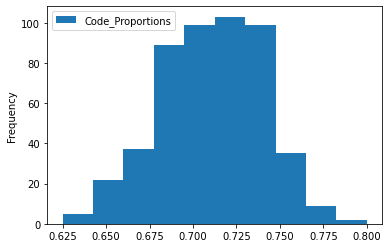

In [49]:
bpd.DataFrame().assign(
    Code_Proportions=code_empirical_props
).plot(kind='hist')

<!-- END QUESTION -->



## 4. Powerball

You go to the nearest supermarket (or the gas station if you prefer) and buy a Powerball lottery ticket.

You pick five different numbers, one at a time, from 1 to 77. Then you separately pick a number from 1 to 33. These are your numbers, for example (59, 12, 85, 20, 3, 25).

The winning numbers are chosen by somebody drawing five balls, one at a time, from a collection of white balls numbered 1 to 77. Then they draw a red ball (the powerball) from a collection of red balls numbered 1 to 33.

We’ll assume for this problem that in order to win the biggest prize (the jackpot), all your numbers need to match the winning numbers and be in the exact same order. However, you can still win some money if you have some numbers that match the winning numbers and appear in the same position as the corresponding winning number.

**Question 4.1.** What is the probability that you win the jackpot? Calculate your answer by hand and assign it to `jackpot_chance`. It should be a decimal number between 0 and 1.

Hint: Since you are choosing five different numbers for the white balls, the denominator should be decreasing. The probability of getting the first number correct is 1/77, the second is 1/76, and so on...

In [50]:
jackpot_chance = 1/77 * 1/76 * 1/75 * 1/74 * 1/73 * 1/33
jackpot_chance

1.2781031329894147e-11

In [51]:
grader.check("q4_1")

q4_1 passed!

**Question 4.2.** Your chance of winning the jackpot is quite low, but you can still win some money if you have at least one number correct, in the same position as the winning number. What is the probability that you get at least one number correct and win some money? Assign your answer to `non_losing_prob`.

In [52]:
non_losing_prob = 1 - (76/77 * 75/76 * 74/75 * 73/74 * 72/73 * 32/33)
non_losing_prob

0.0932703659976386

In [53]:
grader.check("q4_2")

q4_2 passed!

**Question 4.3.** Write a function called `simulate_one_ticket`. It should take no arguments, and it should return an array with 6 random numbers. The first five numbers should all be randomly chosen (without replacement) from between 1 and 77. The last number should be between 1 and 33.

In [54]:
def simulate_one_ticket():
    """Simulate one ticket that you buy."""
    ticket = np.array([])
    ticket = np.random.choice(77, 5, replace=False)
    ticket = np.append(ticket, np.random.choice(33))
    return ticket


In [55]:
grader.check("q4_3")

q4_3 passed!

**Question 4.4.** It's draw day, and you checked the lucky numbers posted, which happened to be (13, 68, 24, 37, 77, 1). Suppose you didn't win the jackpot, and you are quite upset. You want to remind yourself how unlikely it is to win a jackpot. Call the function simulate_one_ticket 100,000 times (this would cost at least $300,000 if you were to buy that many!). How many times did you win the jackpot? Assign your answer to `count_jackpot`.

Hint: Try it first with only buying 10 tickets. Once you are sure you have that figured out, change it to 100,000 tickets. It will take a little while (about a minute) for Python to perform the calculations when you are buying 100,000 tickets.

Hint 2: You'll have to count how many of the numbers you chose match the numbers that were drawn. One way to do this involves np.count_nonzero().

In [56]:
count_jackpot = 0
winning = np.array([13, 68, 24, 37, 77, 1])

for i in np.arange(100000):
    if ( (np.count_nonzero(simulate_one_ticket() == winning) / 6 ) == 1 ):
        count_jackpot +=1 
        
count_jackpot        

0

In [57]:
grader.check("q4_4")

q4_4 passed!

**Question 4.5.** Suppose you can win a smaller prize if you match 1-5 numbers on the ticket. Simulate 100,000 tickets and observe what is the greatest prize you can win. In other words, try to find the maximum number of ticket number matches that would give you a prize and assign this to `wins`.

In [58]:
match_count = np.array([])
winning = np.array([13, 68, 24, 37, 77, 1])

for i in np.arange(100000):
    simulation = simulate_one_ticket()
    if (np.count_nonzero(simulation == winning) > 0):
        match_count = np.append(match_count, np.count_nonzero(simulation == winning))
    
wins = int(match_count.max())
wins 

3

In [59]:
grader.check("q4_5")

q4_5 passed!

Suppose one draw costs $3.

The ticket is advertised that you will never lose with the following winning scheme:

- Win $10 with 1-number match

- Win $150 with 2-numbers match

- Win $1,500 with 3-numbers match

- Win $15,000 with 4-numbers match

- Win $150,000 with 5-numbers match

- Win $1,500,000 for Jackpot

**Question 4.6.** If you had the money to buy 100,000 tickets, how much money are you likely to win? Is it true that you won’t be losing money? Assign the amount to `winning_money`.

In [60]:
match_count = np.array([])
winning = np.array([13, 68, 24, 37, 77, 1])

for i in np.arange(100000):
    simulation = simulate_one_ticket()
    if (np.count_nonzero(simulation == winning) > 0):
        match_count = np.append(match_count, np.count_nonzero(simulation == winning))

winning_money = 0

for index,match in enumerate(match_count):
    if match == 1:
        winning_money += 10
    elif match == 2:
        winning_money += 150   
    elif match == 3:
        winning_money += 1500
    elif match == 4:
        winning_money += 15000
    elif match == 5:
        winning_money += 150000
    elif match == 6:
        winning_money += 1500000

winning_money

121340

In [61]:
grader.check("q4_6")

q4_6 passed!

# Finish Line

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [62]:
grader.check_all()

q1_1 passed!

q1_2 passed!

q1_3 passed!

q1_4 passed!

q2_2 passed!

q2_3 passed!

q2_4 passed!

q2_5 passed!

q2_6 passed!

q2_7 passed!

q2_8 passed!

q3_1 passed!

q3_2 passed!

q3_3 passed!

q3_4 passed!

q3_5 passed!

q3_6 passed!

q3_7 passed!

q4_1 passed!

q4_2 passed!

q4_3 passed!

q4_4 passed!

q4_5 passed!

q4_6 passed!